# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Acquire

In [2]:
#acquire dataset
df= pd.read_csv('bestsellers.csv')

In [3]:
# look at first few rows
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
#look at amount of null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# Takeways:
- no null values present
- no change in datatypes
- may want to consider creating dummies
- dataset has 550 rows and 7 columns

# Prepare

In [5]:
#change all column names to lowercase
df.rename(str.lower, axis='columns', inplace= True)

In [6]:
#verify column names were changed
df.columns

Index(['name', 'author', 'user rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [7]:
#sort values by year
df=df.sort_values(['year'])

In [8]:
# filter for numerical columns only
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('There are {} numerical columns in the dataset'.format(len(numerical_features)))

df[numerical_features].head()

There are 4 numerical columns in the dataset


,user rating,reviews,price,year
177,4.6,1320,7,2009
131,4.6,1365,11,2009
417,4.7,4028,9,2009
241,4.6,5680,10,2009
72,4.8,3837,15,2009


In [9]:
# Filter for only categorical columns
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('There are {} categorical columns in the dataset'.format(len(cat_features)))

df[cat_features].head()

There are 3 categorical columns in the dataset


,name,author,genre
177,"I, Alex Cross",James Patterson,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,Non Fiction
417,The Last Lecture,Randy Pausch,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,Fiction


In [10]:
#looking at all categorical feature
df[cat_features]

,name,author,genre
177,"I, Alex Cross",James Patterson,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,Non Fiction
417,The Last Lecture,Randy Pausch,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,Fiction
...,...,...,...
150,Guts,Raina Telgemeier,Non Fiction
466,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,Non Fiction
462,The Silent Patient,Alex Michaelides,Fiction
130,"Girl, Wash Your Face: Stop Believing the Lies ...",Rachel Hollis,Non Fiction


Text(0.5, 1.0, 'Genre count by year')

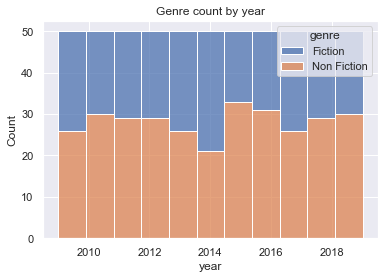

In [35]:
#Stacked bar chart
ax= sns.histplot(df, x='year', hue='genre', multiple= 'stack')

ax.set_title('Genre count by year')

In [23]:
#Look at value counts for genre column
df.genre.value_counts()

Non Fiction    310
Fiction        240
Name: genre, dtype: int64

In [25]:
#Verify what total is printing
total

,year,genre
0,2009,50
1,2010,50
2,2011,50
3,2012,50
4,2013,50
5,2014,50
6,2015,50
7,2016,50
8,2017,50
9,2018,50
